# Clusterização

In [1]:
import pandas as pd

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliação de desenpenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [62]:
dados = "https://raw.githubusercontent.com/SandraRojasZ/Pos_Tech_Data_Analytics/main/Base_de_Dados/mall.csv"

In [3]:
df = pd.read_csv(dados)
df.head(2)

CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1   Male   19                  15                      39
1           2   Male   21                  15                      81

In [5]:
df.shape

(200, 5)

# Limpeza dos dados

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Análise exploratória dos dados


*   Conhecer os dados, identificar padrões, encontrar anomalias, etc.

In [7]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [8]:
df['Annual Income (k$)'].median()

61.5

Analisando a distribuição das variáveis

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

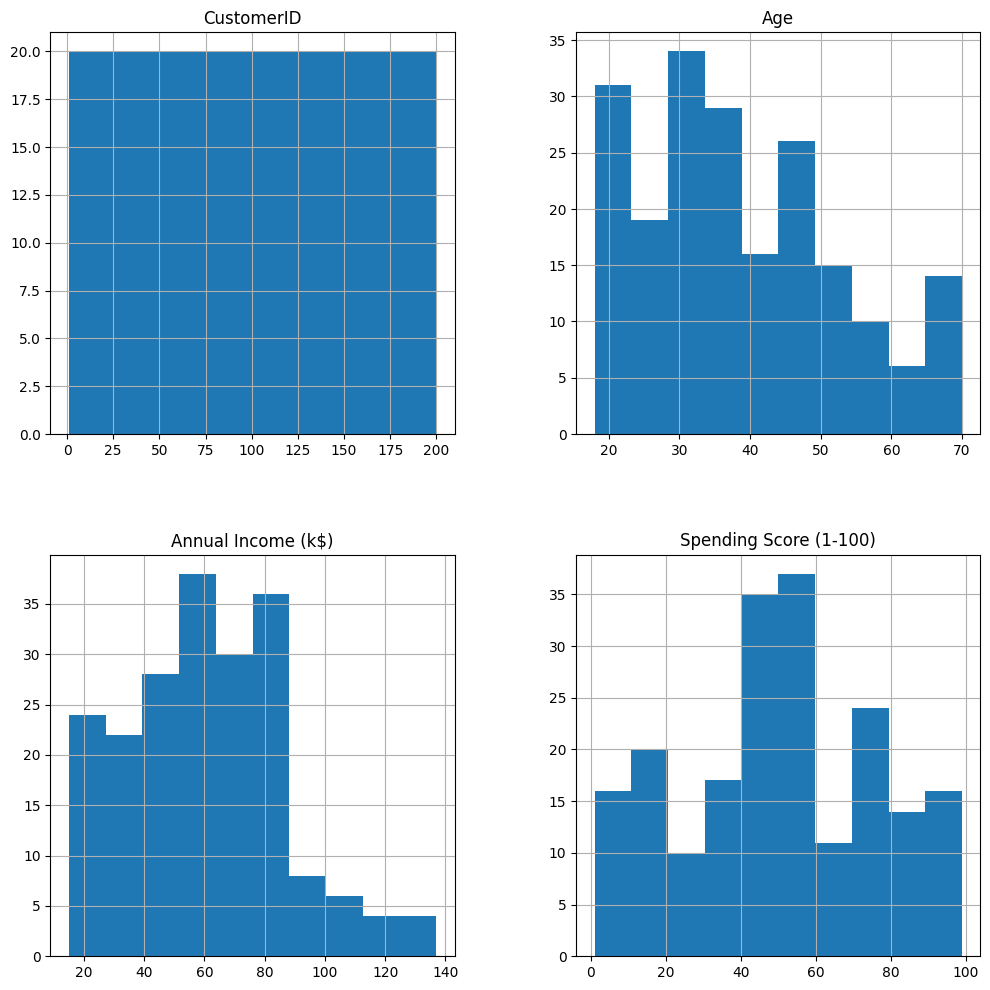

In [9]:
df.hist(figsize=(12,12))

Analisando a correlação entre as variáveis

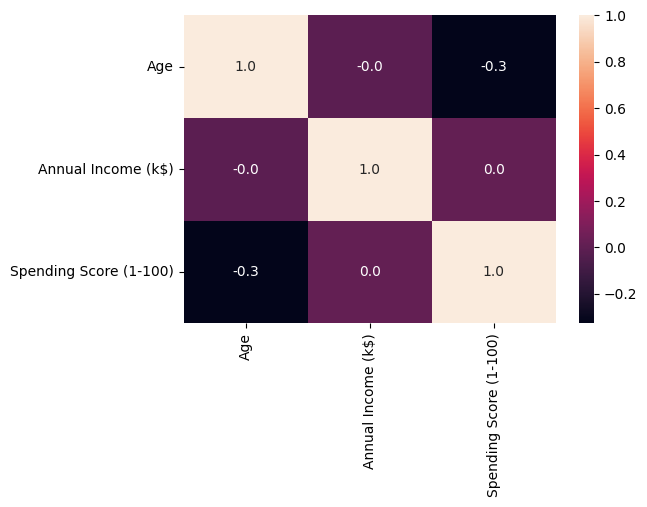

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method = 'pearson'), annot=True, fmt=".1f");

Analisando a proporção entre gêneros

In [13]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Boa proporção entre os gêneros que temos disponíveis em nossos dados

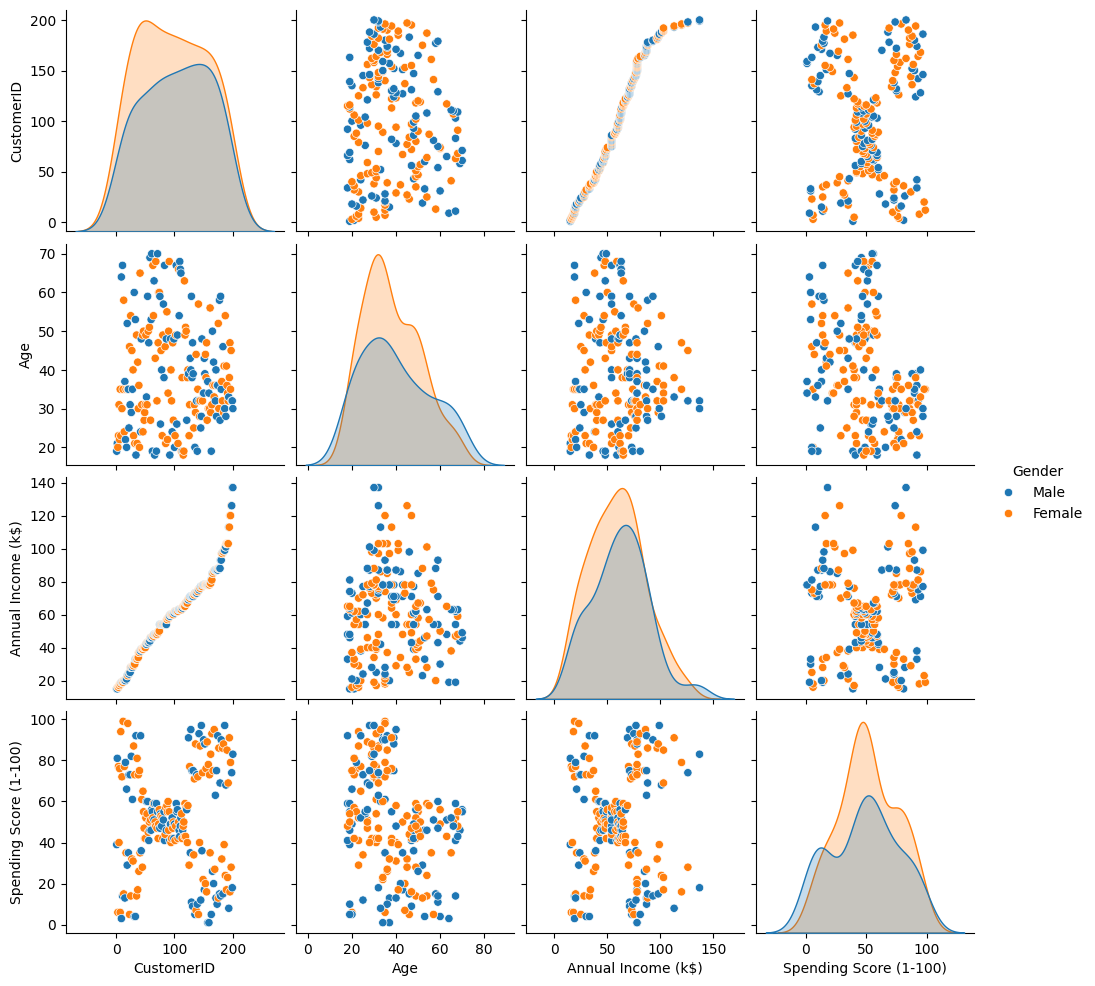

In [14]:
sns.pairplot(df, hue='Gender')
plt.show()

# Feature Scaling

Verificar a necessidade de utilizar a padronização ou normalização dos dados

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Feature Engineer

In [16]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

StandardScaler()

In [17]:
df_escalonados = scaler.transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [18]:
df_escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Criando os agrupamentos

Vamos criar agrupamentoscom diferentes metodologias:


1.   K-Means

Executando o algoritmo sem feature scaling

In [19]:
# Definindo o modelo de clusterização. K-Means com 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0) # definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)

# Implementando o K-Means nos dados:
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

Executando com feature scaling

In [20]:
# Definindo o modelo de clusterização. K-MEANS com 6 clusters
kmeans_escalonados = KMeans(n_clusters=6, random_state=0)

# Implementando o K-Means nos dados:
kmeans.fit(df_escalonados)

# Salvando os centroides de cada cluster
centroides_escalonados = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonados = kmeans.predict(df_escalonados)

In [21]:
df_escalonados = pd.DataFrame(df_escalonados, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

In [22]:
df_escalonados.head(2)

Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704

In [23]:
df_escalonados['Grupos'] = kmeans_labels_escalonados
df_escalonados.head(2)

Annual Income (k$)  Spending Score (1-100)  Grupos
0           -1.738999               -0.434801       3
1           -1.738999                1.195704       5

In [24]:
df['Grupos'] = kmeans_labels
df.head(2)

CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  Grupos
0           1   Male   19                  15                      39       3
1           2   Male   21                  15                      81       5

Vamos analisar a nossa previsão e os centroides

In [25]:
pd.Series(kmeans_labels).value_counts()

0    49
4    39
1    39
2    32
3    21
5    20
Name: count, dtype: int64

In [26]:
  centroides # espaço tridimensional (salário e score de gasto)

array([[62.73469388, 46.91836735],
       [86.53846154, 82.12820513],
       [89.40625   , 15.59375   ],
       [25.14285714, 19.52380952],
       [45.51282051, 51.51282051],
       [24.95      , 81.        ]])

Clusters com feature scaling

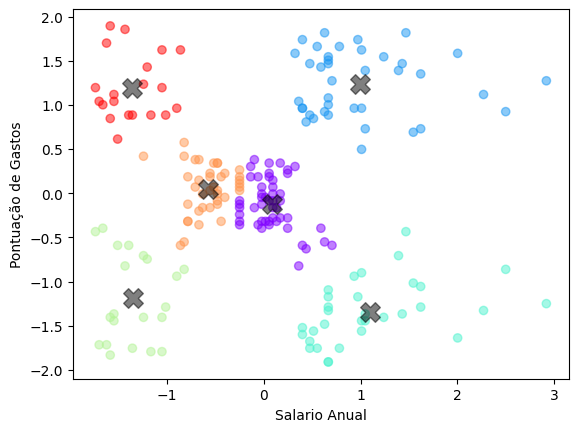

In [27]:
# plotando os dados identificando com os seus clusters
plt.scatter(df_escalonados[['Annual Income (k$)']], df_escalonados[['Spending Score (1-100)']], c=kmeans_labels_escalonados, alpha=0.5, cmap='rainbow')
plt.xlabel("Salario Anual")
plt.ylabel("Pontuação de Gastos")

# plotando os centroides
plt.scatter(centroides_escalonados[:, 0], centroides_escalonados[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

Escolhendo a quantidade de grupos usando o método do "cotovelo"

In [30]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


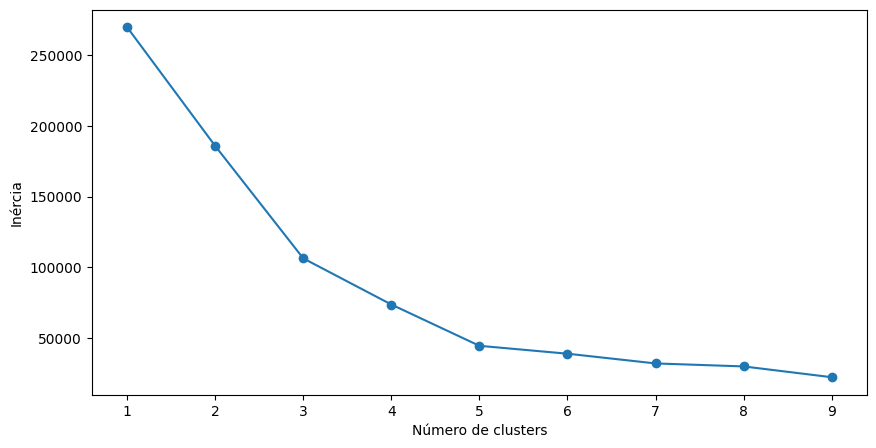

In [31]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-Means para cada k fornecido
for i in k:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  sse.append(kmeans.inertia_) # calculo do erro do k-means (mudar o centroide dos dados)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erro quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

In [33]:
df.groupby('Grupos')['Age'].mean()

Grupos
0    41.836735
1    32.692308
2    41.000000
3    44.142857
4    43.820513
5    24.850000
Name: Age, dtype: float64

In [34]:
df.groupby('Grupos')['Annual Income (k$)'].mean()

Grupos
0    62.734694
1    86.538462
2    89.406250
3    25.142857
4    45.512821
5    24.950000
Name: Annual Income (k$), dtype: float64

Podemos notar que após 3 ou 5 clusters a soma do erro quadratico tem uma duração na forma com a qual a função está decrescendo. Assim podemos adotar 5 clusters. Checando os resultados para 5 clusters.

In [35]:
# Definindo o modelo de clusterização. K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Implementando o K-Means nos dados:
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

# Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

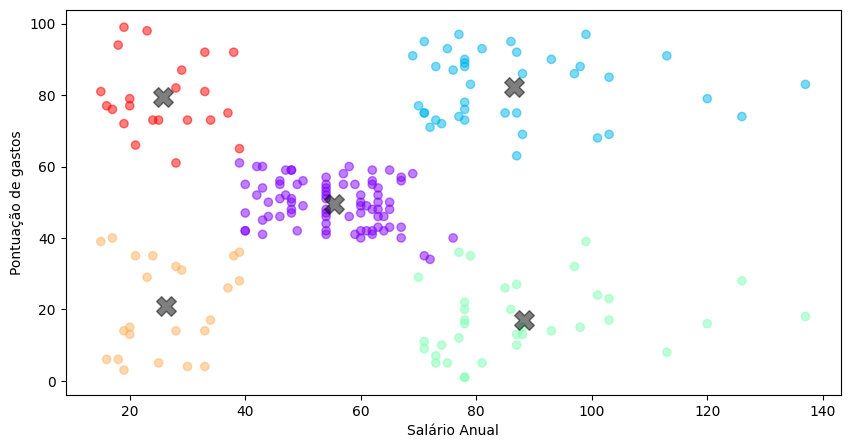

In [36]:
# plotando os dados identificando com os seus clusters
plt.scatter(df[['Annual Income (k$)']], df[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel("Salário Anual")
plt.ylabel('Pontuação de gastos')
# Plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [38]:
dados_grupo_1 = df[df['Grupos'] == 1]
dados_grupo_1

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
123         124    Male   39                  69                      91   
125         126  Female   31                  70                      77   
127         128    Male   40                  71                      95   
129         130    Male   38                  71                      75   
131         132    Male   39                  71                      75   
133         134  Female   31                  72                      71   
135         136  Female   29                  73                      88   
137         138    Male   32                  73                      73   
139         140  Female   35                  74                      72   
141         142    Male   32                  75                      93   
143         144  Female   32                  76                      87   
145         146    Male   28                  77                      97   
147         148  Female   32                  77                      74   
149         150    Male   34                  78                      90   
151         152    Male   39                  78                      88   
153         154  Female   38                  78                      76   
155         156  Female   27                  78                      89   
157         158  Female   30                  78                      78   
159         160  Female   30                  78                      73   
161         162  Female   29                  79                      83   
163         164  Female   31                  81                      93   
165         166  Female   36                  85                      75   
167         168  Female   33                  86                      95   
169         170    Male   32                  87                      63   
171         172    Male   28                  87                      75   
173         174    Male   36                  87                      92   
175         176  Female   30                  88                      86   
177         178    Male   27                  88                      69   
179         180    Male   35                  93                      90   
181         182  Female   32                  97                      86   
183         184  Female   29                  98                      88   
185         186    Male   30                  99                      97   
187         188    Male   28                 101                      68   
189         190  Female   36                 103                      85   
191         192  Female   32                 103                      69   
193         194  Female   38                 113                      91   
195         196  Female   35                 120                      79   
197         198    Male   32                 126                      74   
199         200    Male   30                 137                      83   

     Grupos  
123       1  
125       1  
127       1  
129       1  
131       1  
133       1  
135       1  
137       1  
139       1  
141       1  
143       1  
145       1  
147       1  
149       1  
151       1  
153       1  
155       1  
157       1  
159       1  
161       1  
163       1  
165       1  
167       1  
169       1  
171       1  
173       1  
175       1  
177       1  
179       1  
181       1  
183       1  
185       1  
187       1  
189       1  
191       1  
193       1  
195       1  
197       1  
199       1

In [41]:
dados_grupo_2 = df[df['Grupos'] == 2]

In [42]:
dados_grupo_3 = df[df['Grupos'] == 3]

In [43]:
dados_grupo_4 = df[df['Grupos'] == 4]

In [39]:
dados_grupo_1['Annual Income (k$)'].mean() # grupo 1 azul

86.53846153846153

In [44]:
dados_grupo_2['Annual Income (k$)'].mean() # grupo 2 roxo

89.40625

In [45]:
dados_grupo_3['Annual Income (k$)'].mean() # grupo 3 laranja

25.142857142857142

In [46]:
dados_grupo_4['Annual Income (k$)'].mean() # grupo 1 vermelho

45.51282051282051

In [40]:
dados_grupo_1['Age'].mean()

32.69230769230769

In [47]:
dados_grupo_3['Spending Score (1-100)'].mean()

19.523809523809526

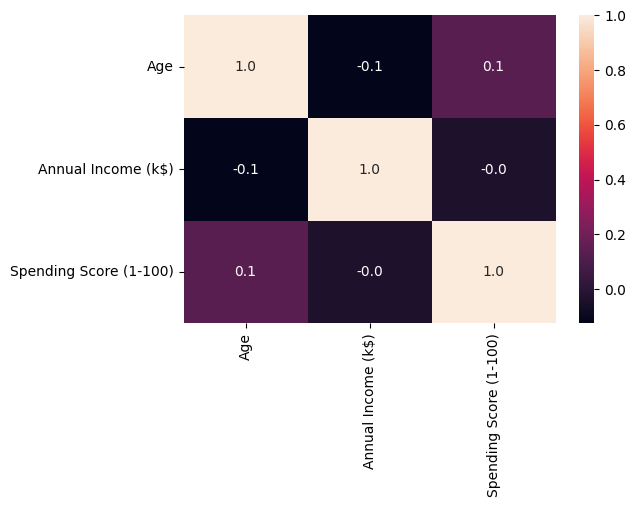

In [50]:
plt.figure(figsize=(6, 4))
sns.heatmap(dados_grupo_1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method = 'pearson'), annot=True, fmt=".1f");

DBSCAN

In [51]:
# Criando o modelo:
dbscan = DBSCAN(eps=10, min_samples=8)
# Ajustando aos dados
dbscan.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Labels com -1 foram classificados como outliers

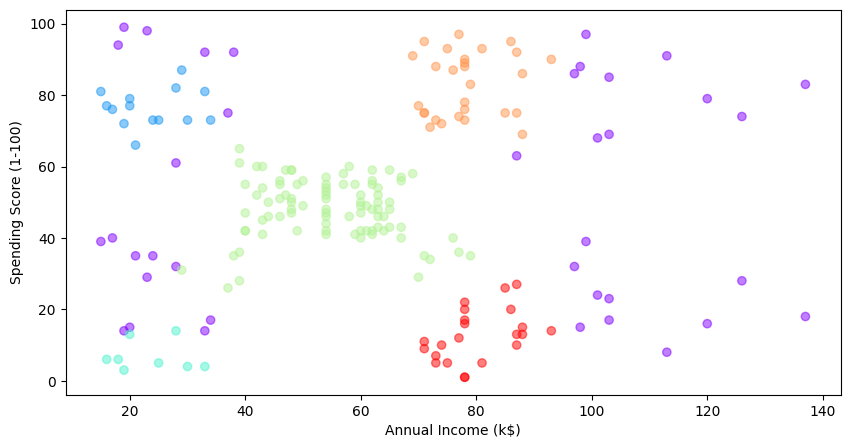

In [53]:
# Plotando o gráfico
plt.scatter(df[['Annual Income (k$)']], df[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

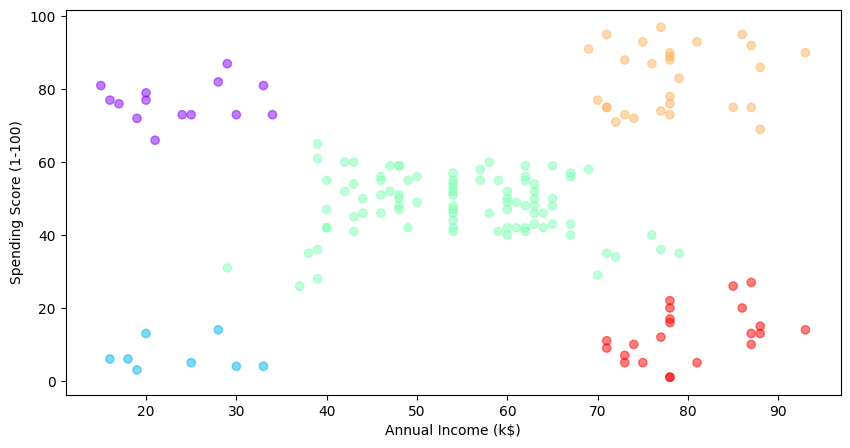

In [55]:
# Plotando o gráfico sem os outliers:
# Máscara para outlier
mascara = dbscan_labels >= 0

# plotando gráfico
plt.scatter(df[['Annual Income (k$)']][mascara], df[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

Checando a quantidade de valores que foram classificados como Outliers

In [56]:
list(mascara).count(False)

38

Comparando entre K-Means e DBSCAN

In [57]:
# Tipo Externo
adjusted_rand_score(kmeans_labels, dbscan_labels)

0.7151933782093212

Tipo Interno

KMEANS

In [59]:
silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans_labels)

0.553931997444648

DBSCAN

In [60]:
silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], dbscan_labels)

0.36328873885121793

# Segmentação de Imagens de Câncer de Mama

In [75]:
# Para processar arquivos e imagens
from PIL import Image
import glob
import numpy as np
import requests

# Para plotar imagens
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.cluster import KMeans # Agrupamento

In [77]:
img_G = "https://raw.githubusercontent.com/SandraRojasZ/Pos_Tech_Data_Analytics/main/Base_de_Dados/mdb001.pgm" # Tipo G
img_D = "https://raw.githubusercontent.com/SandraRojasZ/Pos_Tech_Data_Analytics/main/Base_de_Dados/mdb003.pgm" # Tipo D
img_F = "https://raw.githubusercontent.com/SandraRojasZ/Pos_Tech_Data_Analytics/main/Base_de_Dados/mdb005.pgm" # Tipo F

In [76]:
#img_G = mpimg.imread(img_G)
#response = requests.get(img_G, stream=True)
#with open('mdb001.pgm', 'wb') as out_file:
#    for chunk in response.iter_content(1024):
#        out_file.write(chunk)

In [84]:
# Download and read the images
def download_and_read_image(url, filename):
    response = requests.get(url, stream=True)
    with open(filename, 'wb') as out_file:
        for chunk in response.iter_content(1024):
            out_file.write(chunk)
    # Read the image using mpimg.imread after downloading
    return mpimg.imread(filename)

img_G_data = download_and_read_image(img_G, 'mdb001.pgm')
img_D_data = download_and_read_image(img_D, 'mdb003.pgm')  # Use a different filename
img_F_data = download_and_read_image(img_F, 'mdb005.pgm')

TypeError: Image data of dtype <U100 cannot be converted to float

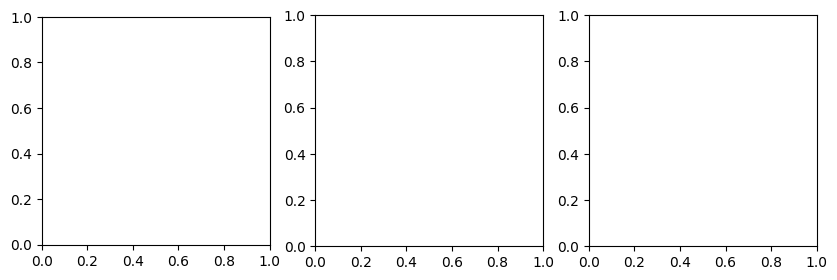

In [87]:
# Plotando as imagens
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
am1 = axs[0].imshow(img_G_data, cmap='gray', vmin=0, vmax=255) # Changed img_G to img_G_data
am2 = axs[1].imshow(img_D_data, cmap='gray', vmin=0, vmax=255) # Changed img_D to img_D_data
am3 = axs[2].imshow(img_F_data, cmap='gray', vmin=0, vmax=255) # Changed img_F to img_F_data
plt.show()